# Loan Eligibilty Prediction 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("loan_data_set.csv")

In [3]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.Loan_Status = data.Loan_Status.map({'Y':1,'N':0})

In [5]:
data.shape

(614, 13)

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


## Preprocessing

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data.Gender=data.Gender.map({"Male":1,"Female":0})

In [10]:
data.Gender.value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [11]:
data.Married=data.Married.map({"Yes":1,"No":0})

In [12]:
data.Married.value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [13]:
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [15]:
data.Dependents.value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [16]:
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [17]:
data.Education.value_counts()

1    480
0    134
Name: Education, dtype: int64

In [18]:
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [19]:
data.Self_Employed.value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [20]:
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [21]:
data.Property_Area.value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


## Filling Missing Values

In [23]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [25]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [26]:
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [27]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [28]:
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [29]:
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [30]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [31]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [33]:
data.drop("Loan_ID",axis = 1, inplace = True)

In [34]:
data.to_csv("Cleaned_data.csv")

## Data Vizualisation

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

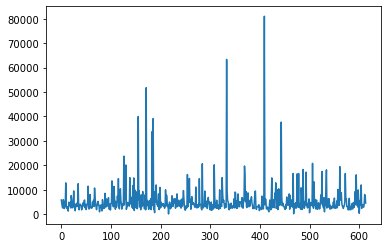

In [36]:
plt.plot(data["ApplicantIncome"])

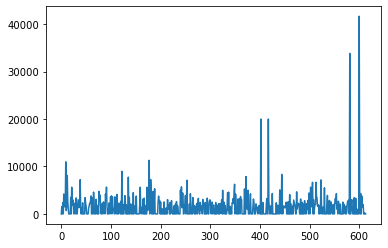

In [37]:
plt.plot(data["CoapplicantIncome"])

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

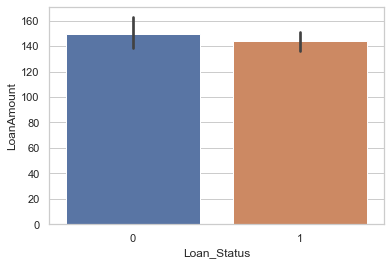

In [38]:
sns.set(style = "whitegrid")
sns.barplot(x= 'Loan_Status', y = 'LoanAmount', data = data)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

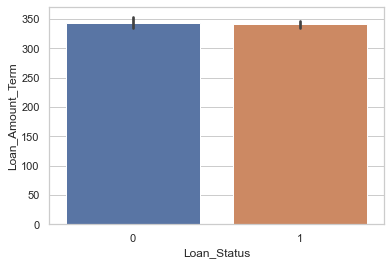

In [39]:
sns.set(style = "whitegrid")
sns.barplot(x= 'Loan_Status', y = 'Loan_Amount_Term', data = data)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

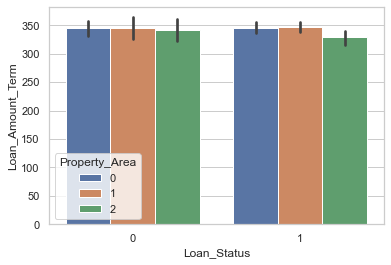

In [40]:
sns.set(style = "whitegrid")
sns.barplot(x= 'Loan_Status', y = 'Loan_Amount_Term', hue = 'Property_Area' ,data = data)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

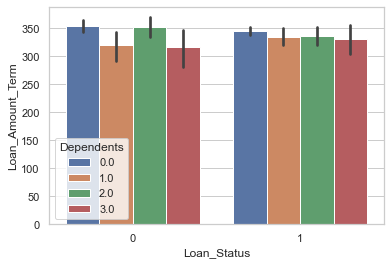

In [41]:
sns.set(style = "whitegrid")
sns.barplot(x= 'Loan_Status', y = 'Loan_Amount_Term', hue = 'Dependents' ,data = data)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

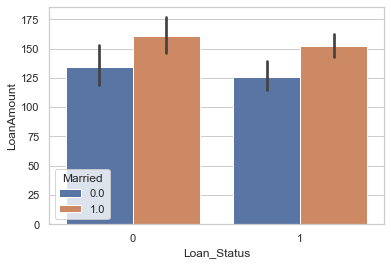

In [42]:
sns.set(style = "whitegrid")
sns.barplot(x= 'Loan_Status', y = 'LoanAmount', hue = 'Married' ,data = data)

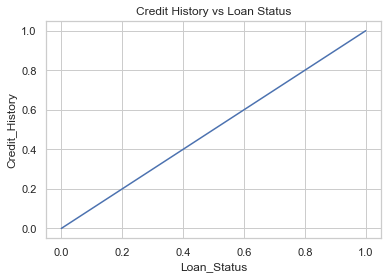

In [43]:
plt.plot(data["Loan_Status"].unique(),data["Credit_History"].unique())
plt.title("Credit History vs Loan Status")
plt.xlabel("Loan_Status")
plt.ylabel("Credit_History")
plt.show()

## Modelling

In [44]:
Input = data.drop('Loan_Status', axis =1)

In [45]:
target = data.iloc[:, -1:]

In [46]:
Input.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [47]:
target.head(2)

,Loan_Status
0,1
1,0


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.metrics import accuracy_score, classification_report


In [50]:
x_train, x_test, y_train, y_test = train_test_split(Input, target, test_size = 1/5, random_state=10)

In [51]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()
model_RFC.fit(x_train, y_train)
pred1 = model_RFC.predict(x_test)
forest = accuracy_score(y_test, pred1)



from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train, y_train)
pred2 = model_KNN.predict(x_test)
k = accuracy_score(y_test, pred2)


from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)
pred4 = model_LR.predict(x_test)
LR=accuracy_score(y_test, pred4)

from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train, y_train)
pred5 = model_DTC.predict(x_test)
DTC=  accuracy_score(y_test, pred5)

print ("""The result were as Follows\nRandom Forest Classifer {}\n\n K Nearest Neighbors {}
\n\nLogistic Regression {}\n\n Decision Tree Classifier {}
""".format(forest,k,LR,DTC))

C:\Users\kirti\AppData\Local\Temp\ipykernel_6676\1309876461.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC.fit(x_train, y_train)
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kirti\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The result were as Follows
Random Forest Classifer 0.7235772357723578

 K Nearest Neighbors 0.6097560975609756


Logistic Regression 0.7723577235772358

 Decision Tree Classifier 0.6747967479674797



In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_curve,auc
conf_matrix = confusion_matrix(y_test,pred4)
conf_matrix

array([[13, 23],
       [ 5, 82]], dtype=int64)

In [53]:
prediction = model_LR.predict(x_test)

In [54]:
print(prediction)

[1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1]


In [55]:
import pickle
pickle_out = open('LR_loan.pkl','wb')
pickle.dump(model_LR,pickle_out)
pickle_out.close()